# **DZAKY RAIHAN AHMAD - 1301204316**
# **FARHAN REYPIALFARIZI M - 1301200033**

[ASSIGNMENT 5] Cats vs Dogs Classification

Fruit classification (10 Class).

Dengan acuan source code cats vs dogs berikut. Lakukan klasifikasi  Fruit classification(10 Class), dari dataset ini https://www.kaggle.com/datasets/karimabdulnabi/fruit-classification10-class

Kemudian modifikasi agar akurasi minimal mencapai 80%.

In [20]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

In [21]:
local_zip = 'dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [22]:
base_dir = '/tmp/'
train_dir = os.path.join(base_dir, 'MY_data/train')
test_dir = os.path.join(base_dir, 'MY_data/test')

In [23]:
train_apple = os.path.join(train_dir, 'Apple')
train_avocado = os.path.join(train_dir, 'avocado')
train_banana = os.path.join(train_dir, 'Banana')
train_cherry = os.path.join(train_dir, 'cherry')
train_kiwi = os.path.join(train_dir, 'kiwi')
train_mango = os.path.join(train_dir, 'mango')
train_orange = os.path.join(train_dir, 'orange')
train_pineapple = os.path.join(train_dir, 'pineapple')
train_strawberries = os.path.join(train_dir, 'strawberries')
train_watermelon = os.path.join(train_dir, 'watermelon')

In [24]:
test_apple = os.path.join(test_dir, 'apple')
test_avocado = os.path.join(test_dir, 'avocado')
test_banana = os.path.join(test_dir, 'banana')
test_cherry = os.path.join(test_dir, 'cherry')
test_kiwi = os.path.join(test_dir, 'kiwi')
test_mango = os.path.join(test_dir, 'mango')
test_orange = os.path.join(test_dir, 'orange')
test_pineapple = os.path.join(test_dir, 'pineapple')
test_strawberries = os.path.join(test_dir, 'stawberries')
test_watermelon = os.path.join(test_dir, 'watermelon')

In [25]:
train_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255,
        validation_split=0.2
    )
test_datagen = ImageDataGenerator(
        rotation_range=15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        width_shift_range=0.1,
        height_shift_range=0.1,
        rescale=1./255
    )

In [26]:
train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2301 images belonging to 10 classes.


In [27]:
test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1025 images belonging to 10 classes.


In [28]:
label = ['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']

In [29]:
train=train_datagen.flow_from_directory(
    train_dir,
    classes=label,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="training"
)

Found 1841 images belonging to 10 classes.


In [30]:
validation=train_datagen.flow_from_directory(
    train_dir,
    classes=label,
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical",
    subset="validation"
)

Found 460 images belonging to 10 classes.


In [31]:
test=test_datagen.flow_from_directory(
    test_dir,
    classes=list(map(lambda x:x.lower().replace("strawberries","strawberries"),label)),
    color_mode="rgb",
    batch_size=64,
    target_size=(256,256),
    class_mode="categorical"
)

Found 922 images belonging to 10 classes.


In [32]:
model = tf.keras.models.Sequential([
    layers.RandomRotation(0.1, input_shape=(256, 256, 3)),
    layers.RandomZoom(0.1),
    layers.RandomFlip(),
    layers.GaussianNoise(0.03),

    layers.Conv2D(32, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    
    layers.Conv2D(64, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    
    layers.Conv2D(128, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2),
    
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(len(label), activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
callback_trigger=[
    callbacks.EarlyStopping(monitor="accuracy",patience=15,restore_best_weights=True),
    callbacks.ReduceLROnPlateau(factor=0.85,monitor="accuracy",patience=15)
]

In [33]:
history=model.fit(train,validation_data=validation,epochs=220,verbose=1, callbacks=callback_trigger)

Epoch 1/150
29/29 [==============================] - 126s 4s/step - loss: 2.2481 - accuracy: 0.1586 - val_loss: 2.0443 - val_accuracy: 0.2739 - lr: 0.0020
Epoch 2/150
29/29 [==============================] - 114s 4s/step - loss: 2.0703 - accuracy: 0.2374 - val_loss: 1.8213 - val_accuracy: 0.3130 - lr: 0.0020
Epoch 3/150
29/29 [==============================] - 114s 4s/step - loss: 1.8943 - accuracy: 0.2911 - val_loss: 1.7435 - val_accuracy: 0.3109 - lr: 0.0020
Epoch 4/150
29/29 [==============================] - 112s 4s/step - loss: 1.8423 - accuracy: 0.2857 - val_loss: 1.6237 - val_accuracy: 0.4391 - lr: 0.0020
Epoch 5/150
29/29 [==============================] - 113s 4s/step - loss: 1.7565 - accuracy: 0.3134 - val_loss: 1.5912 - val_accuracy: 0.4304 - lr: 0.0020
Epoch 6/150
29/29 [==============================] - 117s 4s/step - loss: 1.7033 - accuracy: 0.3417 - val_loss: 1.5558 - val_accuracy: 0.4217 - lr: 0.0020
Epoch 7/150
29/29 [==============================] - 112s 4s/step - lo

In [34]:
_, acc = model.evaluate(test, verbose=0)
print('Test Accuracy: %.2f%%' % (acc * 100))

Test Accuracy: 67.57%


In [35]:
_, acc = model.evaluate(validation, verbose=0)
print('Validation Accuracy: %.2f%%' % (acc * 100))

Validation Accuracy: 70.43%


Text(0.5, 1.0, 'Training and validation loss')

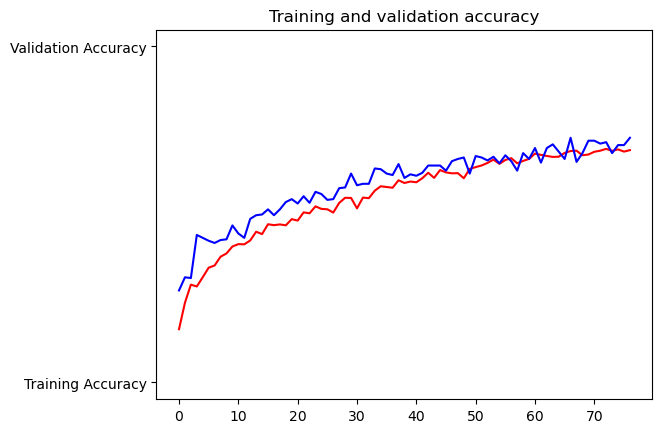

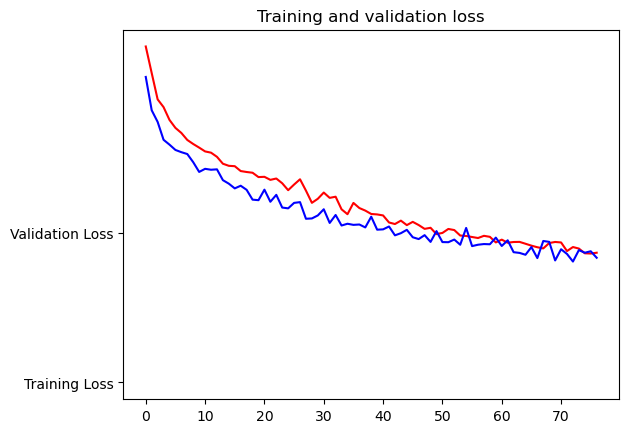

In [36]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [37]:
import pandas as pd

predict_dir = os.path.join(base_dir, 'MY_data/predict')

# List all image files in the predict directory
image_files = [f for f in os.listdir(predict_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Create a DataFrame with the file names
df = pd.DataFrame({'filename': image_files, 'class': ['unknown'] * len(image_files)})

predict_datagen = ImageDataGenerator(rescale=1./255)

predict_generator = predict_datagen.flow_from_dataframe(
    df,
    directory=predict_dir,
    x_col='filename',
    y_col='class',
    class_mode=None,  # No labels in prediction mode
    target_size=(256, 256),
    color_mode="rgb",
    shuffle=False  # Set to False to ensure predictions are ordered
)

Found 48 validated image filenames.


2/2 [==============================] - 1s 336ms/step
File: 0.jpeg, Predicted Class: strawberries
File: 00.jpeg, Predicted Class: cherry
File: 011.jpeg, Predicted Class: strawberries
File: 012.jpeg, Predicted Class: Apple
File: 0122.jpeg, Predicted Class: watermelon
File: 0124.jpeg, Predicted Class: watermelon
File: 023.jpeg, Predicted Class: watermelon
File: 1.jpeg, Predicted Class: cherry
File: 147.jpeg, Predicted Class: kiwi
File: 2.jpeg, Predicted Class: kiwi
File: 202.jpeg, Predicted Class: kiwi
File: 22.jpeg, Predicted Class: pinenapple
File: 3.jpeg, Predicted Class: strawberries
File: 321.jpeg, Predicted Class: mango
File: 33.jpeg, Predicted Class: pinenapple
File: 365.jpeg, Predicted Class: Banana
File: 4.jpeg, Predicted Class: mango
File: 41.jpeg, Predicted Class: strawberries
File: 65.jpeg, Predicted Class: cherry
File: 659.jpeg, Predicted Class: Banana
File: 66.jpeg, Predicted Class: pinenapple
File: 68.jpeg, Predicted Class: cherry
File: 77.jpeg, Predicted Class: pinenapple


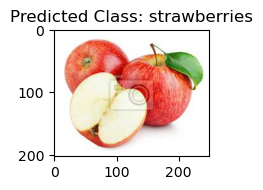

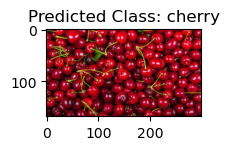

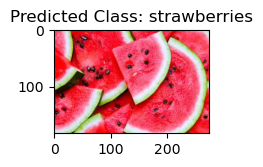

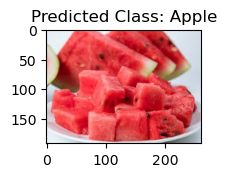

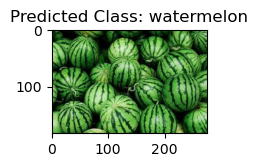

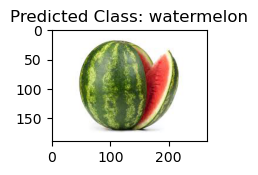

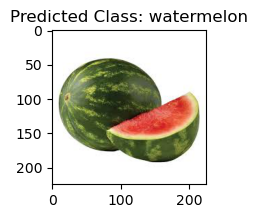

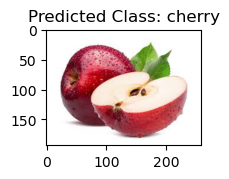

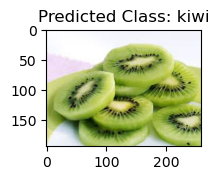

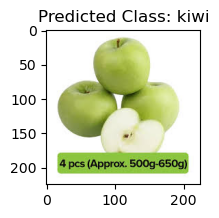

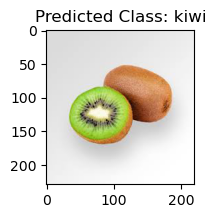

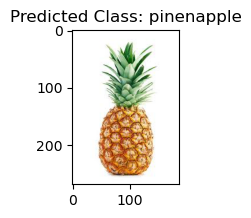

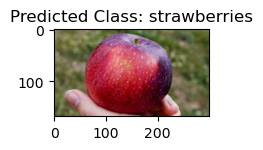

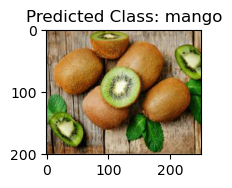

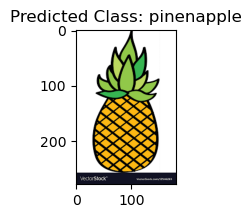

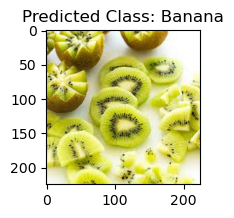

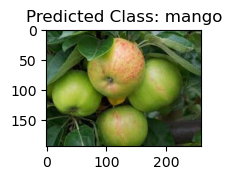

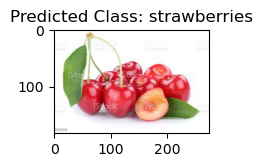

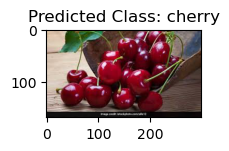

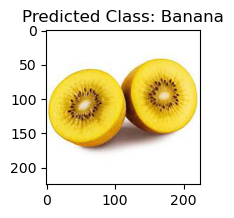

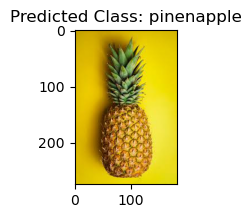

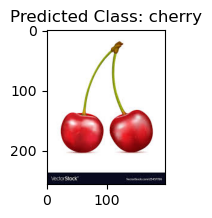

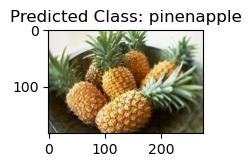

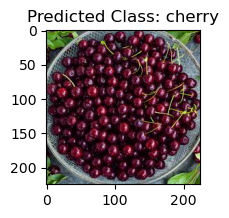

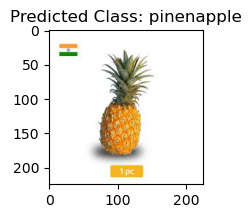

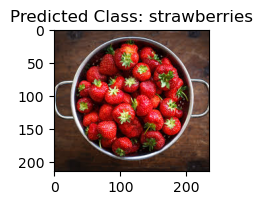

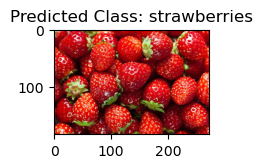

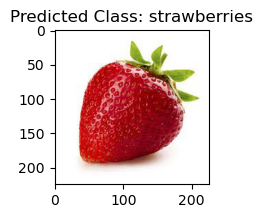

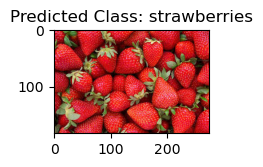

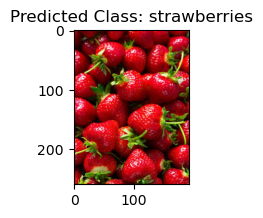

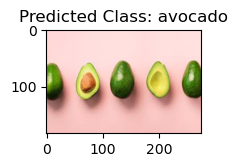

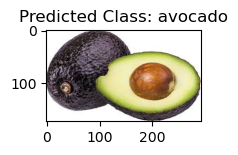

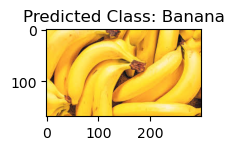

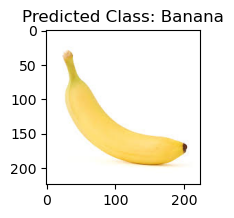

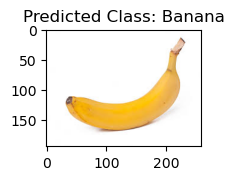

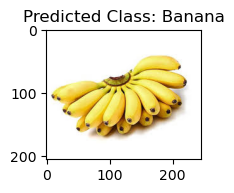

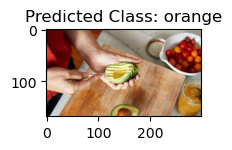

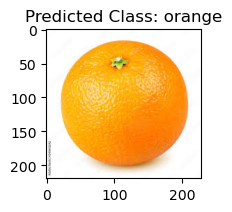

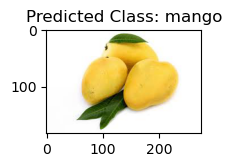

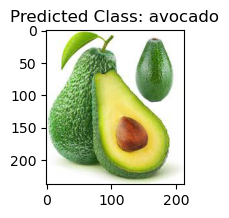

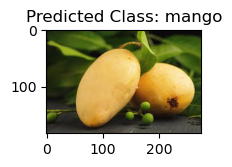

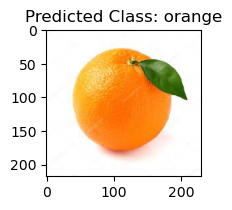

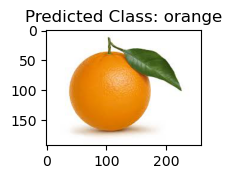

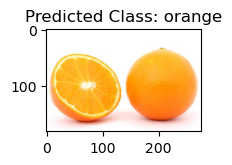

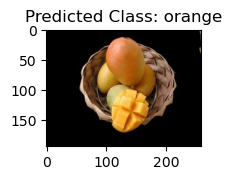

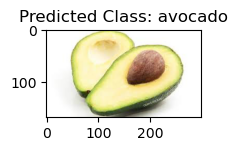

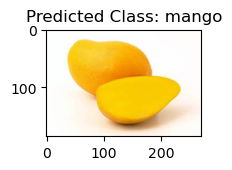

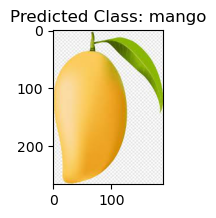

In [38]:
# Generate predictions for the images in the predict folder
predictions = model.predict(predict_generator)

# Assuming you have a variable `classes` containing the class names
class_names = label

# Get the predicted class indices for each image
predicted_class_indices = predictions.argmax(axis=1)

# Map the predicted class indices to class names
predicted_class_names = [class_names[i] for i in predicted_class_indices]

# Print the results
for filename, predicted_class in zip(predict_generator.filenames, predicted_class_names):
    print(f"File: {filename}, Predicted Class: {predicted_class}")

# If you want to visualize the images along with predictions
# Note: This requires Matplotlib and PIL (Pillow) to be installed
import matplotlib.pyplot as plt
from PIL import Image

# Display the first few images with their predictions
num_images_to_display = 48

for i in range(min(num_images_to_display, len(predict_generator.filenames))):
    img_path = os.path.join(predict_dir, predict_generator.filenames[i])
    fig_size = (2, 2)
    plt.figure(figsize=fig_size)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class_names[i]}")
    plt.show()